# Question 4 and 5

In [21]:
#libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

## Open the file

In [2]:
file_path = 'co2_emissions2.csv'
df=pd.read_csv(file_path,index_col='Country')
df.head()

,renewable_energy_percentage,Alternative and nuclear energy (% of total energy use),fossil_fuel_energy_percentage,Energy use (kg of oil equivalent per capita),CO2 emissions (kt),CPIA policy and institutions for environmental sustainability rating (1=low to 6=high),GDP (current US$),"School enrollment, primary (% gross)",Employment in industry (% of total employment) (modeled ILO estimate),Population growth (annual %),Population
Country,,,,,,,,,,,
Algeria,0.1,0.030106,99.977917,1333.136069,161563.0,3.25,2.398995e+11,108.761642,30.850998,1.554019,45606480.0
Angola,52.9,2.548840,48.305593,540.864116,19814.5,2.50,8.472296e+10,88.574997,5.673967,3.030996,36684202.0
Argentina,9.2,5.501504,87.722407,2029.922825,154535.9,3.50,6.405914e+11,110.156113,19.954905,0.903771,46654581.0
Armenia,9.1,25.718264,74.561866,1023.809919,6746.6,3.00,2.421213e+10,92.902382,14.038897,-0.089917,2777970.0
Australia,12.3,2.154394,89.625630,5483.816402,378996.8,3.00,1.723827e+12,99.132988,18.636642,2.370900,26638544.0


## Binary target (Significant reduction)

In [3]:
df['Significant_Reduction'] = (df['CO2 emissions (kt)'].shift(-10) < df['CO2 emissions (kt)']).astype(int)

In [4]:
features = df.drop(columns=['School enrollment, primary (% gross)', 'CO2 emissions (kt)', 'Significant_Reduction'])
target = df['Significant_Reduction']

In [5]:
df['Significant_Reduction']

Country
Algeria                  1
Angola                   1
Argentina                1
Armenia                  0
Australia                1
                        ..
Tuvalu                   0
Uganda                   0
Vanuatu                  0
Virgin Islands (U.S.)    0
West Bank and Gaza       0
Name: Significant_Reduction, Length: 213, dtype: int32

### Splitting and testing the model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluationprint(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        34
           1       0.55      0.57      0.56        30

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



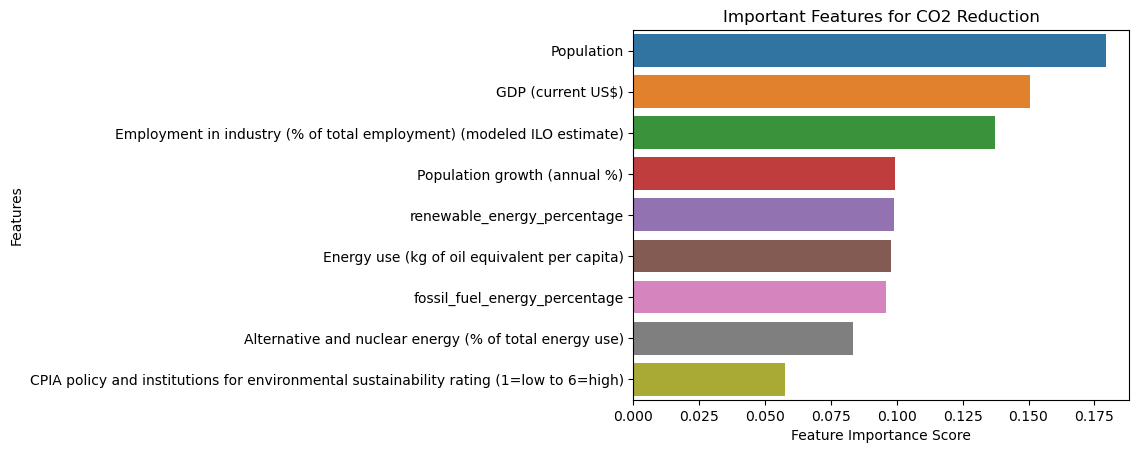

In [8]:
importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting feature importance
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features for CO2 Reduction')
plt.show()

# Question 5
## Hypotherical scenario

In [9]:
percent=10
df_filtrado = df[df['renewable_energy_percentage'] < percent]
nc = df_filtrado.shape[0]

print(f'The amount of countries that have a renewable energy percent below than {percent}% are {nc}.')

The amount of countries that have a renewable energy percent below than 10% are 67.


In [10]:
increase=50.0
df_filtrado.loc[df_filtrado['renewable_energy_percentage']<10,'renewable_energy_percentage'] = 50

In [11]:
df_filtrado=df_filtrado.drop(columns=['School enrollment, primary (% gross)', 'CO2 emissions (kt)', 'Significant_Reduction'])
df_scaled=scaler.transform(df_filtrado)

In [12]:
# Step 5: Strategic Analysis
# Predict the likelihood of CO2 reduction in this scenario
prediction = model.predict_proba(df_scaled)
df_filtrado['prediction']=prediction[:, 1]

In [37]:
condicion=df_filtrado['prediction'] >=0.5

In [44]:
print(f'Number countries where there is a likelihood of significant CO2 reduction: {condicion.sum()}')
print(f'Number countries where there is not a likelihood of significant CO2 reduction: {nc-condicion.sum()}')

Number countries where there is a likelihood of significant CO2 reduction: 33
Number countries where there is not a likelihood of significant CO2 reduction: 34


In [46]:
x = df_filtrado.index
y = df_filtrado['prediction']
colores = ['red' if condicion<0.5 else 'blue' for condicion in df_filtrado['prediction']]
names = df_filtrado['prediction']


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=y,
    mode='markers',
    marker=dict(size=10, color=colores),
    text=names,
    hoverinfo='text',
    name='Prediction'
))




fig.update_layout(
    title='Predict the likelihood of CO2 reduction',
    xaxis=dict(
        title='',
        showticklabels=True  # Ocultar etiquetas del eje x
    ),
    xaxis_title='Country',
    yaxis_title='Likelihood of CO2 emmisions reduction',
)

fig.write_html("Predict the likelihood of CO2 reduction in this scenario.html")
fig.show()
